# Image Classification with Convolutional Neural Networks (CNN): Recognizing Clothing Categories

### Convolution Neural Netwrok

In neural networks, Convolutional neural network (ConvNets or CNNs) is one of the main categories to do images recognition, images classifications. Objects detections, recognition faces etc., are some of the areas where CNNs are widely used.

CNN models to train and test, each input image will pass it through a series of convolution layers with filters (Kernals), Pooling, fully connected layers (FC) and apply Softmax function to classify an object with probabilistic values between 0 and 1.

The dataset which I will use is Fashion-MNIST classification dataset. This is a dataset of 60,000 28x28 pixel grayscale images of items of 10 types of clothing, along with a test set of 10,000 images.

The mapping of all 0-9 integers to class labels is listed below.

0: T-shirt/top<br>
1: Trouser<br>
2: Pullover<br>
3: Dress<br>
4: Coat<br>
5: Sandal<br>
6: Shirt<br>
7: Sneaker<br>
8: Bag<br>
9: Ankle boot<br>

In [ ]:
from keras.datasets import fashion_mnist
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)

(60000, 28, 28)


In [ ]:
print(x_test.shape)

(10000, 28, 28)


Create a plot of the first nine images in the training dataset.

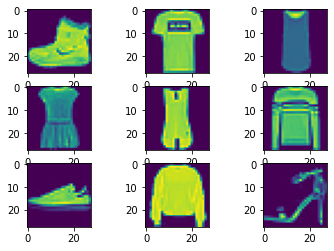

In [ ]:
import matplotlib.pyplot as plt
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(x_train[i])
# show the figure
plt.show()

To process images in neural network, we have to indicate how may channels (depth) we are going to use. For instance, a colorful image from a standard digital camera will have a red, green and blue channel (RGB), so it has 3 channels (i.e. depth=3) in total, whereas a grayscale image only has 1 channel (depth=1).

The Fashion-MNIST dataset is grayscale, and we can reshape Fashion-MNIST to have a single channel. (i.e., Convert each 28 x 28 image of the train and test set into a matrix of size 28 x 28 x 1.)

In [ ]:
x_train=x_train.reshape((60000,28,28,1))
x_test=x_test.reshape((10000,28,28,1))

We know that the pixel values for each image in the dataset are unsigned integers in the range between black and white, or 0 and 255.

In [ ]:
#Normalize the pixel values of grayscale images
x_train=x_train/255.0
x_test=x_test/255.0

In [ ]:
#Convert the target values into binary values (one-hot encoding)
y_train= to_categorical(y_train)
y_test= to_categorical(y_test)

### Implement build_cnn_model() that returns a CNN model 
### that takes an input of image, passes it to:
- A convolution layer with 32 filters and kernel size 5x5
- A MaxPool layer of size 2x2
- Another convolution layer with 64 filters and kernel size 5x5
- Another MaxPool layer of size 2x2
- Another convolution layer with 128 filters and kernel size 3x3
- Another MaxPool layer of size 2x2
- Flatten it
- Add one regular fully-connected layer of 128 units

Our goal is to minimize the categorical_crossentropy loss

In [ ]:
def build_cnn_model():
    model = Sequential()
    model.add(
        Conv2D(
            filters=32,
            kernel_size=(5,5),
            padding='same',
            input_shape=(28,28,1)
        )
    )

    model.add(MaxPool2D((2,2)))

    model.add(
        Conv2D(
            filters=64,
            kernel_size=(5,5),
            padding='same'
        )
    )

    model.add(MaxPool2D((2,2)))

    model.add(
        Conv2D(
            filters=128,
            kernel_size=(5,5),
            padding='same'
        )
    )

    model.add(MaxPool2D((2,2)))

    model.add(Flatten())

    model.add(
        Dense(
            units=128,
            activation='relu'
        )
    )

    model.add(
        Dense(
            units=10,
            activation='softmax'
        )
    )

    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

    return model

model = build_cnn_model()

In [ ]:
#Fit CNN model
model.fit(x_train,y_train,batch_size=100,epochs=5)

Epoch 1/5
600/600 [==============================] - 12s 7ms/step - loss: 0.4570 - accuracy: 0.8372
Epoch 2/5
600/600 [==============================] - 4s 7ms/step - loss: 0.2891 - accuracy: 0.8960
Epoch 3/5
600/600 [==============================] - 4s 6ms/step - loss: 0.2354 - accuracy: 0.9137
Epoch 4/5
600/600 [==============================] - 4s 6ms/step - loss: 0.1984 - accuracy: 0.9263
Epoch 5/5
600/600 [==============================] - 4s 6ms/step - loss: 0.1675 - accuracy: 0.9375


In [ ]:
#Evaluate model
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2870 - accuracy: 0.9037


[0.2869625687599182, 0.9036999940872192]

### Check the performance of multi-layer perceptrons (MLP) in image classfication

I will now implement build_mlp_model() that returns a MLP model that takes an input of image, passes it to 1 Flatten layer then 3 full-connected layers and the final fully-connected readout layer.

In [ ]:
def build_mlp_model():
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(784, activation='relu', input_shape=(x_train.shape[-1],)))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

    return model

model2 = build_mlp_model()

In [ ]:
#Fit MLP model
model2.fit(x_train,y_train,batch_size=100,epochs=5)

Epoch 1/5
600/600 [==============================] - 2s 3ms/step - loss: 0.4925 - accuracy: 0.8237
Epoch 2/5
600/600 [==============================] - 2s 3ms/step - loss: 0.3591 - accuracy: 0.8677
Epoch 3/5
600/600 [==============================] - 2s 3ms/step - loss: 0.3218 - accuracy: 0.8817
Epoch 4/5
600/600 [==============================] - 2s 3ms/step - loss: 0.2961 - accuracy: 0.8903
Epoch 5/5
600/600 [==============================] - 2s 3ms/step - loss: 0.2818 - accuracy: 0.8949


In [ ]:
#Evaluate model
model2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3278 - accuracy: 0.8823


[0.3278214931488037, 0.8823000192642212]

### Autoencoder

An autoencoder is a special type of neural network that is trained to copy its input to its output. For example, given an image of a handwritten digit, an autoencoder first encodes the image into a lower dimensional latent representation, then decodes the latent representation back to an image. It learns to compress the data while minimizing the reconstruction error.

The orginal dimensionality is 784 (=28x28), but we want to compress it into the dimensionality of 4 by an encoder, then reconstruct these (4,) vectors back to 28x28 images by an decoder.

In [ ]:
from keras.models import Model
from keras.layers import Reshape, Input

# encoder layers
encoding_dim = 4
encoded = Sequential()

encoded.add(Flatten())

encoded.add(Dense(784, activation='relu',input_shape=(784,)))

encoded.add(Dense(400, activation='relu'))

encoded.add(Dense(100, activation='relu'))

encoded.add(Dense(encoding_dim, activation='relu'))

######################

# decoder layers
decoded = Sequential()

decoded.add(Dense(100, activation='relu',input_shape=(4,)))

decoded.add(Dense(400, activation='relu'))

decoded.add(Dense(784, activation='relu'))

decoded.add(Dense(784, activation='relu'))

decoded.add(Reshape((28,28,1)))

######################
img_x, img_y = 28, 28
input_x = Input(shape=(img_x, img_y, 1))
code = encoded(input_x)
output = decoded(code)

autoencoder = Model(input_x,output)

autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
autoencoder.fit(x_train,x_train,epochs=10,batch_size=25)

Epoch 1/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.0340
Epoch 2/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.0244
Epoch 3/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.0224
Epoch 4/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.0209
Epoch 5/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.0202
Epoch 6/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.0199
Epoch 7/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.0193
Epoch 8/10
2400/2400 [==============================] - 6s 3ms/step - loss: 0.0190
Epoch 9/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.0187
Epoch 10/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.0185


In [ ]:
autoencoder.evaluate(x_test,x_test)

######################
# output images as numpy arrays
encoded_imgs = encoded(x_test).numpy()
decoded_imgs = decoded(encoded_imgs).numpy()

313/313 [==============================] - 1s 2ms/step - loss: 0.0190


### Plot the Encoded Image

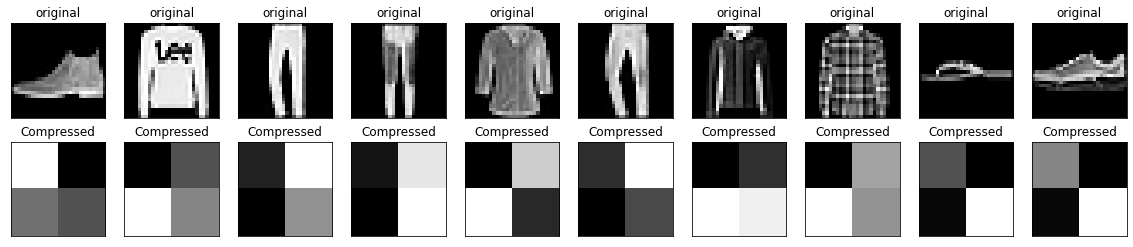

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(encoded_imgs[i].reshape(2,2))
  plt.title("Compressed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

### Plot the Decoded Image

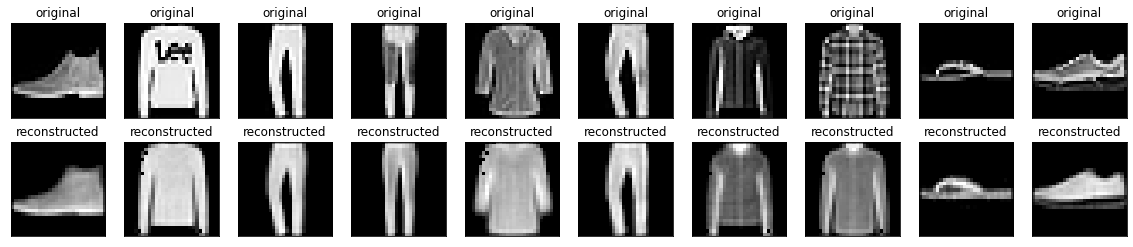

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()